In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
vr_df = pd.read_csv("Resources/Vacancy Rate Concat.csv").dropna()
vr_df = vr_df.rename(columns={'Bachelor ': 'Bachelor','Dwelling Type ': 'Dwelling Type','Total ': 'Total'})
vr_df.head()

,Province,Centre,Zone,Neighbourhood,Dwelling Type,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total,Year
0,Nfld.Lab.,St. John's,St. John's East,St. John's East,Row,0.0,0.0,0.0,0.0,0.0,2018
1,Nfld.Lab.,St. John's,St. John's East,St. John's East,Apt & Other,0.0,3.9,6.4,5.2,5.6,2018
2,Nfld.Lab.,St. John's,St. John's West,St. John's West,Row,0.0,0.0,0.0,0.0,1.5,2018
3,Nfld.Lab.,St. John's,St. John's West,St. John's West,Apt & Other,3.9,6.1,6.1,0.0,6.2,2018
4,Nfld.Lab.,St. John's,Remainder of CMA,Remainder of CMA,Row,0.0,0.0,0.0,0.0,0.0,2018


In [13]:
vr_trend_df = vr_df[['Province','Year','Total']]

provinces_for_trend = ["Alta", "B.C.","Ont.","Que","Sask."]

vr_trend_df = vr_trend_df[(vr_trend_df['Province'].isin(provinces_for_trend))]

vr_trend_df = pd.pivot_table(vr_trend_df, index='Year', columns='Province', aggfunc='mean', fill_value=0).reset_index()

vr_trend_df.columns = ["Year", "Alta", "B.C.", "Ont.","Que","Sask."]

vr_trend_df.head()

,Year,Alta,B.C.,Ont.,Que,Sask.
0,2018,2.908537,0.548571,0.805187,0.683668,4.197297
1,2019,2.832927,0.590000,0.840346,0.464322,3.317568
2,2020,2.805285,1.145238,1.096254,0.559296,3.351351
3,2021,2.645935,0.577143,1.007349,0.412563,2.710811
4,2022,1.249187,0.538571,0.611960,0.316080,1.577027


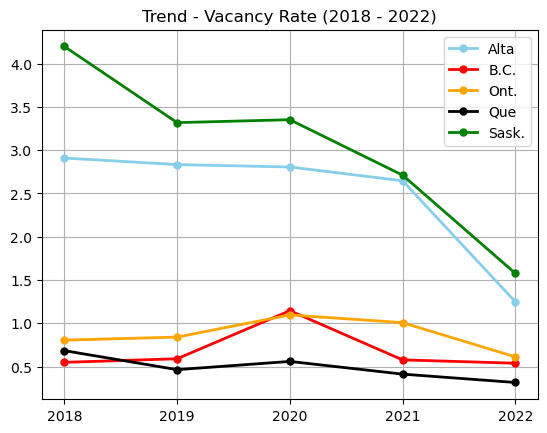

In [14]:
#plot Rent Trend:
plt.plot( 'Year', 'Alta', data=vr_trend_df, marker='o', markerfacecolor='skyblue', markersize=5, color='skyblue', linewidth=2)
plt.plot( 'Year', 'B.C.', data=vr_trend_df, marker='o', markerfacecolor='red', markersize=5, color='red', linewidth=2)

plt.plot( 'Year', 'Ont.', data=vr_trend_df, marker='o', markerfacecolor='orange', markersize=5, color='orange', linewidth=2)
plt.plot( 'Year', 'Que', data=vr_trend_df, marker='o', markerfacecolor='black', markersize=5, color='black', linewidth=2)
plt.plot( 'Year', 'Sask.', data=vr_trend_df, marker='o', markerfacecolor='green', markersize=5, color='green', linewidth=2)

plt.xticks([2018,2019,2020,2021,2022])

plt.title("Trend - Vacancy Rate (2018 - 2022)")
plt.grid()
plt.legend()

plt.show()

In [15]:
vr_df_2022 = vr_df[(vr_df['Year']==2022)]

vr_summary_bachelor = vr_df_2022.groupby(["Province"]).mean(numeric_only=True)["Bachelor"]
vr_summary_one_bedroom = vr_df_2022.groupby(["Province"]).mean(numeric_only=True)["1 Bedroom"]
vr_summary_two_bedroom = vr_df_2022.groupby(["Province"]).mean(numeric_only=True)["2 Bedroom"]
vr_summary_three_bedroom_plus = vr_df_2022.groupby(["Province"]).mean(numeric_only=True)["3 Bedroom +"] 
vr_summary_three_bedroom_total = vr_df_2022.groupby(["Province"]).mean(numeric_only=True)["Total"] 

vr_summary_2022 = pd.concat([vr_summary_bachelor, vr_summary_one_bedroom, vr_summary_two_bedroom,
                           vr_summary_three_bedroom_plus, vr_summary_three_bedroom_total]
                          , axis=1)

vr_summary_2022.columns = ["Bachelor", "1 Bedroom", "2 Bedroom", "3 Bedroom +","Total"]
vr_summary_2022

,Bachelor,1 Bedroom,2 Bedroom,3 Bedroom +,Total
Province,,,,,
Alta,0.271138,0.886179,1.029675,0.486992,1.249187
B.C.,0.345238,0.412381,0.515714,0.279524,0.538571
Man.,0.524138,1.012069,1.062069,1.189655,1.446552
N.B.,0.000000,0.182692,0.217308,0.171154,0.296154
N.S.,0.061538,0.232692,0.303846,0.076923,0.413462
Nfld.Lab.,1.983333,1.683333,0.566667,0.500000,1.433333
Ont.,0.157493,0.462392,0.411095,0.148271,0.611960
Que,0.091457,0.260804,0.198241,0.083920,0.316080
Sask.,0.875676,1.329730,1.377027,0.428378,1.577027


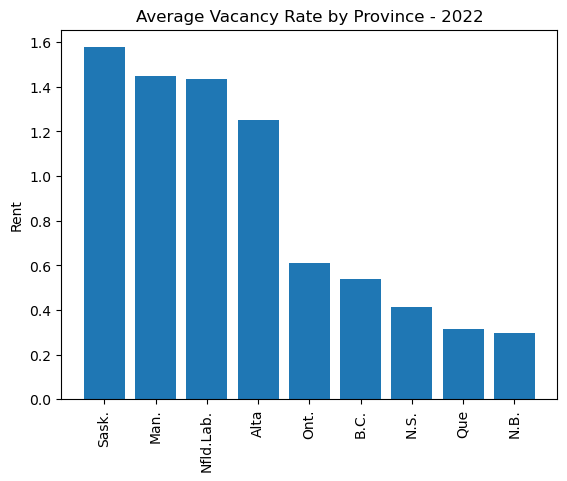

In [16]:
#plot Total:
vr_summary = vr_summary_2022.sort_values(by="Total", ascending=False)
x = vr_summary.index
y = vr_summary['Total']

plt.ylabel("Rent")
plt.xticks(rotation=90)
plt.bar(x,y)

plt.title("Average Vacancy Rate by Province - 2022")

plt.show()

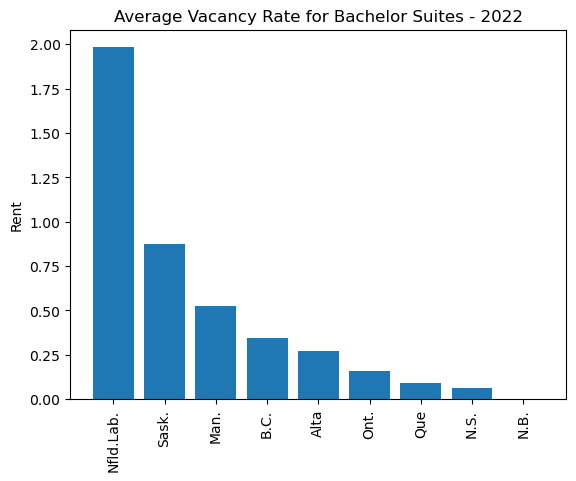

In [17]:
#plot 1:
vr_summary = vr_summary_2022.sort_values(by="Bachelor", ascending=False)
x = vr_summary.index
y = vr_summary['Bachelor']

plt.ylabel("Rent")
plt.xticks(rotation=90)
plt.bar(x,y)

plt.title("Average Vacancy Rate for Bachelor Suites - 2022")

plt.show()

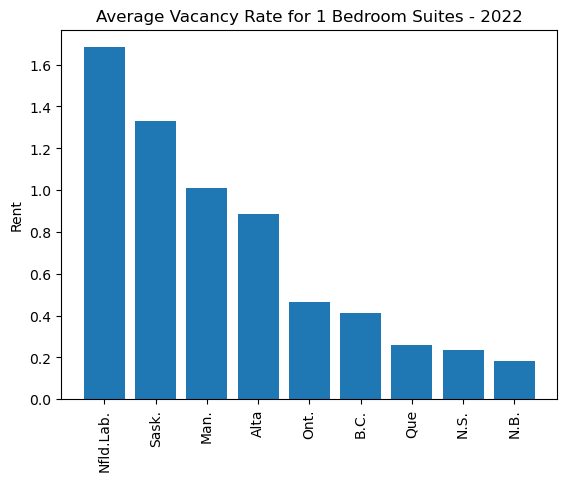

In [18]:
#plot 2:
vr_summary = vr_summary_2022.sort_values(by="1 Bedroom", ascending=False)
x = vr_summary.index
y = vr_summary['1 Bedroom']

plt.ylabel("Rent")
plt.xticks(rotation=90)
plt.bar(x,y)

plt.title("Average Vacancy Rate for 1 Bedroom Suites - 2022")

plt.show()

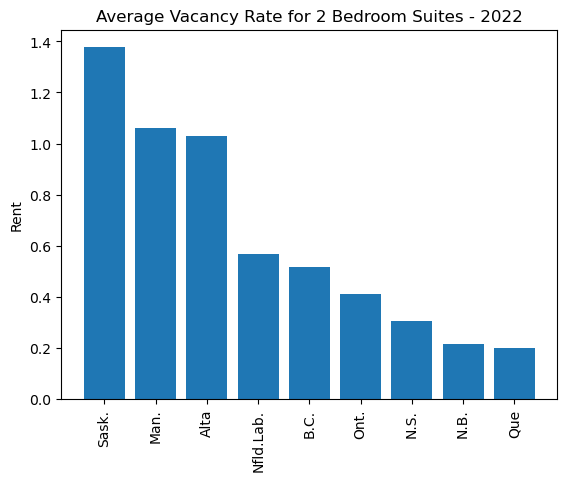

In [19]:
#plot 3:
vr_summary = vr_summary_2022.sort_values(by="2 Bedroom", ascending=False)
x = vr_summary.index
y = vr_summary['2 Bedroom']

plt.ylabel("Rent")
plt.xticks(rotation=90)
plt.bar(x,y)

plt.title("Average Vacancy Rate for 2 Bedroom Suites - 2022")

plt.show()

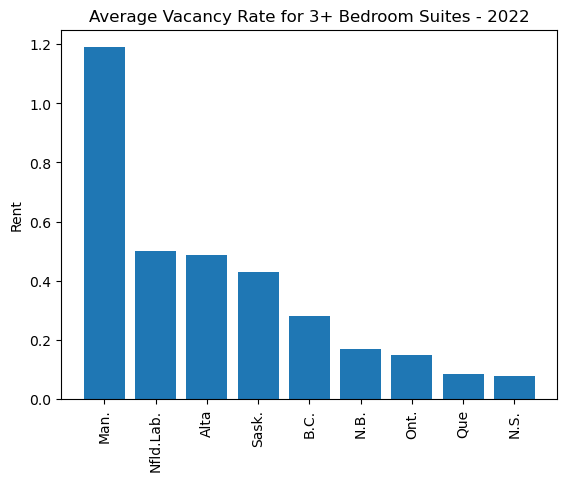

In [20]:
#plot 4:
vr_summary = vr_summary_2022.sort_values(by="3 Bedroom +", ascending=False)
x = vr_summary.index
y = vr_summary['3 Bedroom +']

plt.ylabel("Rent")
plt.xticks(rotation=90)
plt.bar(x,y)

plt.title("Average Vacancy Rate for 3+ Bedroom Suites - 2022")

plt.show()